In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
toss=np.array(["s","c","c","c","c"])

In [14]:
def P(H):
    return 1

In [9]:
#def P(event,data):
 #   p=np.count_nonzero(toss == event)/np.size(toss)
  #  return p

In [34]:
H=np.arange(0,1.1,0.1)
H

array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ])

In [35]:
def P_obs_H(nc,ns,H):
    P=H**nc*(1-H)**ns
    return P

In [36]:
P_obs_H(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H)

array([0.000e+00, 6.561e-02, 8.192e-02, 7.203e-02, 5.184e-02, 3.125e-02,
       1.536e-02, 5.670e-03, 1.280e-03, 9.000e-05, 0.000e+00])

In [37]:
def P_H_obs(nc,ns,H,toss):
    p=P_obs_H(nc,ns,H)*P(H)/np.size(toss)
    return p

In [38]:
y=P_H_obs(np.count_nonzero(toss == "s"),np.count_nonzero(toss == "c"),H,toss)

Text(0, 0.5, 'P(H|obs)')

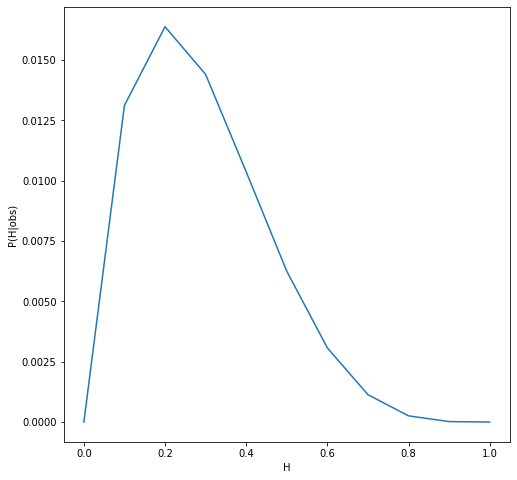

In [39]:
plt.figure(figsize=(8,8))
plt.plot(H,y)
plt.xlabel("H")
plt.ylabel('P(H|obs)')

In [48]:
def x_max(y):
    for i in range(np.size(y)-1):
        if np.diff(y)[i]*np.diff(y)[i+1]<0 :
            print (y[i]+y[i+1])/2

In [49]:
x_max(y)

0.029506000000000004


TypeError: unsupported operand type(s) for /: 'NoneType' and 'int'

In [32]:
np.diff(y)

array([ 0.013122,  0.003262, -0.001978, -0.004038, -0.004118, -0.003178,
       -0.001938, -0.000878, -0.000238])

In [40]:
np.diff(np.diff(y))

array([-9.86e-03, -5.24e-03, -2.06e-03, -8.00e-05,  9.40e-04,  1.24e-03,
        1.06e-03,  6.40e-04,  2.20e-04])

In [41]:
np.abs(-1)

1